Replied data CSV from: C:/Users/20243898/Downloads/tweets_classified_Lufthansa.csv
Not Replied data CSV from: C:/Users/20243898/Downloads/tweets_wo_reply_classified.csv
Output plots to: C:\Users\20243898\Downloads\lufthansa_topic_reply_status_from_2_csvs
Loaded 51,433 rows from REPLIED tweets CSV.
Loaded 82,790 rows from NOT-REPLIED tweets CSV.

Combined Reply Status Counts by Topic:


,Lufthansa Replied,Lufthansa Did Not Reply,total_for_topic
primary_topic,,,
contact / reachability,21544,48898,70442
other,6871,17806,24677
app / website issues,10665,2796,13461
baggage / luggage issues,4925,4492,9417
seat / upgrade issues,3383,3507,6890
flight delay or cancellation,1843,4089,5932
refund or compensation,2202,1202,3404


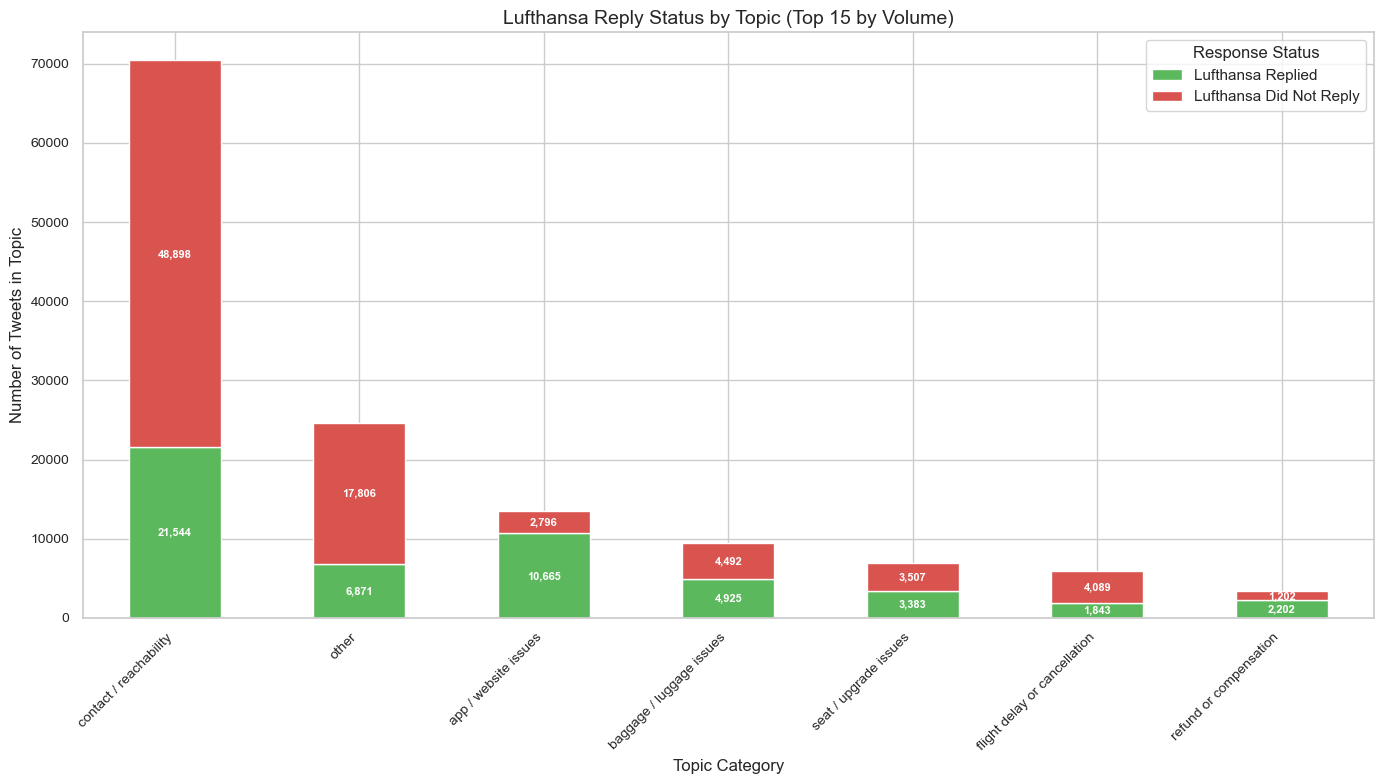


--- Topic-based Reply Status Analysis from Separate CSVs Complete ---


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import os


REPLIED_TOPICS_CSV_PATH = r"C:/Users/20243898/Downloads/tweets_classified_Lufthansa.csv"
NOT_REPLIED_TOPICS_CSV_PATH = r"C:/Users/20243898/Downloads/tweets_wo_reply_classified.csv"

PLOTS_OUTPUT_DIR = os.path.join(os.path.expanduser('~'), 'Downloads', 'lufthansa_topic_reply_status_from_2_csvs')
os.makedirs(PLOTS_OUTPUT_DIR, exist_ok=True)
print(f"Replied data CSV from: {REPLIED_TOPICS_CSV_PATH}")
print(f"Not Replied data CSV from: {NOT_REPLIED_TOPICS_CSV_PATH}")
print(f"Output plots to: {PLOTS_OUTPUT_DIR}")

TOPIC_COLUMN_NAME_IN_CSV = 'primary_topic'

sns.set(style="whitegrid"); pd.options.display.max_columns = 60; pd.options.display.float_format = '{:.1f}'.format


df_replied_topics = pd.DataFrame()
df_not_replied_topics = pd.DataFrame()

if os.path.exists(REPLIED_TOPICS_CSV_PATH):
    try:
        df_replied_topics = pd.read_csv(REPLIED_TOPICS_CSV_PATH, low_memory=False)
        print(f"Loaded {len(df_replied_topics):,} rows from REPLIED tweets CSV.")
        if TOPIC_COLUMN_NAME_IN_CSV not in df_replied_topics.columns:
            print(f"ERROR: Topic column '{TOPIC_COLUMN_NAME_IN_CSV}' missing in REPLIED CSV. Available: {df_replied_topics.columns.tolist()}")
            df_replied_topics = pd.DataFrame()
    except Exception as e:
        print(f"Error loading REPLIED tweets CSV: {e}")
        df_replied_topics = pd.DataFrame()
else:
    print(f"ERROR: REPLIED tweets CSV file not found at {REPLIED_TOPICS_CSV_PATH}.")

if os.path.exists(NOT_REPLIED_TOPICS_CSV_PATH):
    try:
        df_not_replied_topics = pd.read_csv(NOT_REPLIED_TOPICS_CSV_PATH, low_memory=False)
        print(f"Loaded {len(df_not_replied_topics):,} rows from NOT-REPLIED tweets CSV.")
        if TOPIC_COLUMN_NAME_IN_CSV not in df_not_replied_topics.columns:
            print(f"ERROR: Topic column '{TOPIC_COLUMN_NAME_IN_CSV}' missing in NOT-REPLIED CSV. Available: {df_not_replied_topics.columns.tolist()}")
            df_not_replied_topics = pd.DataFrame()
    except Exception as e:
        print(f"Error loading NOT-REPLIED tweets CSV: {e}")
        df_not_replied_topics = pd.DataFrame()
else:
    print(f"ERROR: NOT-REPLIED tweets CSV file not found at {NOT_REPLIED_TOPICS_CSV_PATH}.")


replied_counts_by_topic = pd.Series(dtype='int64')
not_replied_counts_by_topic = pd.Series(dtype='int64')

if not df_replied_topics.empty and TOPIC_COLUMN_NAME_IN_CSV in df_replied_topics.columns:
    df_replied_topics[TOPIC_COLUMN_NAME_IN_CSV] = df_replied_topics[TOPIC_COLUMN_NAME_IN_CSV].fillna('Unknown Topic').astype('category')
    replied_counts_by_topic = df_replied_topics[TOPIC_COLUMN_NAME_IN_CSV].value_counts().rename('Lufthansa Replied')
else:
    print("Replied topics DataFrame is empty or missing the topic column.")

if not df_not_replied_topics.empty and TOPIC_COLUMN_NAME_IN_CSV in df_not_replied_topics.columns:
    df_not_replied_topics[TOPIC_COLUMN_NAME_IN_CSV] = df_not_replied_topics[TOPIC_COLUMN_NAME_IN_CSV].fillna('Unknown Topic').astype('category')
    not_replied_counts_by_topic = df_not_replied_topics[TOPIC_COLUMN_NAME_IN_CSV].value_counts().rename('Lufthansa Did Not Reply')
else:
    print("Not-replied topics DataFrame is empty or missing the topic column.")


if not replied_counts_by_topic.empty or not not_replied_counts_by_topic.empty:
    df_plot_data = pd.concat([replied_counts_by_topic, not_replied_counts_by_topic], axis=1).fillna(0).astype(int)
    
    df_plot_data['total_for_topic'] = df_plot_data['Lufthansa Replied'] + df_plot_data['Lufthansa Did Not Reply']
    df_plot_data = df_plot_data.sort_values('total_for_topic', ascending=False)

    print("\nCombined Reply Status Counts by Topic:")
    display(df_plot_data)

    if not df_plot_data.empty:
        top_n_topics_to_plot = 15 
        plot_df_final = df_plot_data.head(top_n_topics_to_plot)[['Lufthansa Replied', 'Lufthansa Did Not Reply']]

        if not plot_df_final.empty:
            ax_stacked = plot_df_final.plot(
                kind='bar',
                stacked=True,
                figsize=(14, 8),
                color={'Lufthansa Replied':'#5CB85C', 'Lufthansa Did Not Reply':'#D9534F'} 
            )
            plt.title(f'Lufthansa Reply Status by Topic (Top {top_n_topics_to_plot} by Volume)', fontsize=14)
            plt.ylabel('Number of Tweets in Topic', fontsize=12)
            plt.xlabel('Topic Category', fontsize=12)
            plt.xticks(rotation=45, ha="right", fontsize=10)
            plt.yticks(fontsize=10)
            plt.legend(title='Response Status', loc='upper right')

            for container in ax_stacked.containers:
                labels = [f'{int(v.get_height()):,}' if v.get_height() > 0 else '' for v in container]
                ax_stacked.bar_label(container, labels=labels, label_type='center', fontsize=8, color='white', weight='bold')

            plt.tight_layout()
            plt.savefig(os.path.join(PLOTS_OUTPUT_DIR, 'lufthansa_replied_vs_not_by_topic_from_2csv.png'))
            plt.show()
        else:
            print("Not enough data after filtering top N topics to create stacked bar chart.")
    else:
        print("No aggregated data to plot for topic reply summary after combining CSVs.")
else:
    print("One or both input CSVs were not loaded or processed correctly. Analysis skipped.")

print("\n--- Topic-based Reply Status Analysis from Separate CSVs Complete ---")